Finalizando a classe Valor
==========================



## Introdução



Chegou a hora de finalizar a classe `Valor`!



## Objetivo



O objetivo é fazer com que a classe `Valor` seja capaz de realizar algumas operações necessárias para que seja usada na nossa rede neural artificial.



## Importações



In [1]:
import math
from funcoes import plota_grafo

## Código e discussão



### Finalizando a classe `Valor`



Aqui está a classe `Valor` assim como feita na aula anterior. Vamos modificá-la para cumprir nossos objetivos (ver objetivos na próxima seção).



In [2]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_adicao():
            self.grad += saida.grad * 1
            outro_valor.grad += saida.grad * 1

        saida.propagar = propagar_adicao

        return saida
    
    def __radd__(self, outro_valor): # outro_valor + self
        return self + outro_valor

    def __mul__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_multiplicacao():
            self.grad += saida.grad * outro_valor.data
            outro_valor.grad += saida.grad * self.data

        saida.propagar = propagar_multiplicacao

        return saida

    def __rmul__(self, outro_valor): # outro_valor * self
        return self * outro_valor
    
    def __pow__(self, exponente):
        assert isinstance(exponente, (int, float))
        
        data = self.data ** exponente
        progenitor = (self, )
        operador_mae = f'**{exponente}'
        saida = Valor(data, progenitor, operador_mae)
        
        def propagar_exponenciacao():
            self.grad += said.grad * deivada_local
        
        saida.propagar = propagar_exponenciacao
        
        return saida
    
    def __truediv__(self, outro_valor): # self / outro_valor
        return self * outro_valor ** (-1)
    
    def __neg__(self): # - self
        return self * (-1)
    
    def __sub__(self, outro_valor): # self - outro_valor
        return self + (-outro_valor)
    
    def __rsub__(self, outro_valor): # self - outro_valor
        return -self + outro_valor
    
    def exp(self):
        data = math.exp(self.data)
        progenitor = (self, )
        operador_mae = 'exp'
        saida = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += saida.grad * exponente * (self.data ** (exponente - 1))
        
        saida.propagar = propagar_exp
        
        return saida
    
    def sig(self):
        return self.exp() / (self.exp() + 1)

    def propagar(self):
        pass

    def propagar_tudo(self):
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        self.grad = 1  # o gradiente do vértice folha deve ser 1

        for v in reversed(ordem_topologica):
            v.propagar()

### Objetivos a serem cumpridos



Quero poder acidionar uma instância de `Valor` com uma constante qualquer.



Valor(data=11)


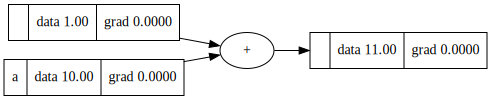

In [3]:
a = Valor(10, rotulo="a")
b = a + 1
print(b)
plota_grafo(b)

Quero poder multiplicar uma instância de `Valor` com uma constante qualquer.



Valor(data=100)


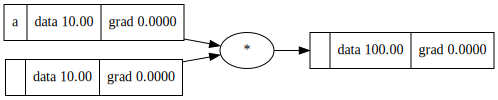

In [4]:
a = Valor(10, rotulo="a")
b = a * 10
print(b)
plota_grafo(b)

Quero poder acidionar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



Valor(data=11)


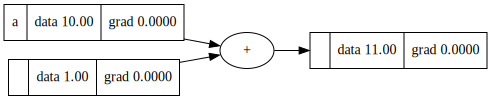

In [5]:
a = Valor(10, rotulo="a")
b = 1 + a
print(b)
plota_grafo(b)

Quero poder multiplicar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



Valor(data=100)


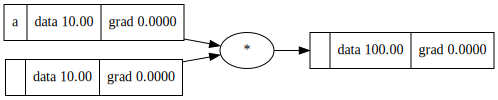

In [6]:
a = Valor(10, rotulo="a")
b = 10 * a
print(b)
plota_grafo(b)

Quero poder aplicar a função exponencial ($e^x$) em uma instância de `Valor`, computando corretamente o gradiente local desta operação.



Valor(data=2.718281828459045)


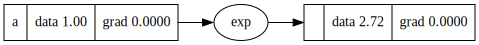

In [7]:
a = Valor(1, rotulo="a")
b = a.exp()
print(b)
plota_grafo(b)

Quero poder elevar uma instância de `Valor` a um número real qualquer. **Nota**: não vai funcionar se fizer um `Valor` elevado a outro `Valor` pois vamos propagar os gradientes apenas considerando que estamos elevando a uma constante qualquer.



Valor(data=100)


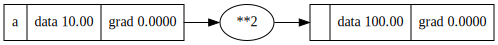

In [8]:
a = Valor(10, rotulo="a")
b = a**2
print(b)
plota_grafo(b)

Quero poder dividir uma instância de `Valor` por outra instância de `Valor`.



Valor(data=0.5)


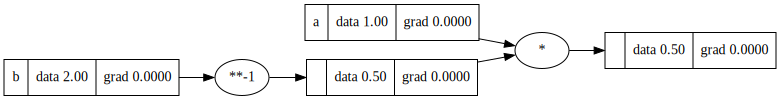

In [9]:
a = Valor(1, rotulo="a")
b = Valor(2, rotulo="b")
c = a / b
print(c)
plota_grafo(c)

Quero poder computar o negativo de uma instância de `Valor`.



Valor(data=-1)


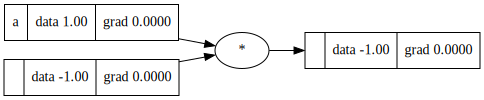

In [10]:
a = Valor(1, rotulo="a")
b = -a
print(b)
plota_grafo(b)

Quero poder subtrair uma instância de `Valor` por outra instância de `Valor`.



Valor(data=7)


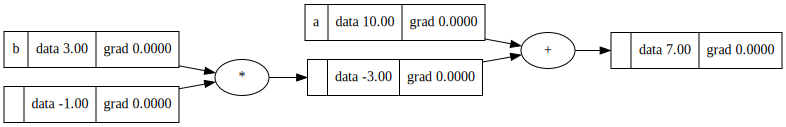

In [11]:
a = Valor(10, rotulo="a")
b = Valor(3, rotulo="b")
c = a - b
print(c)
plota_grafo(c)

Valor(data=-8)


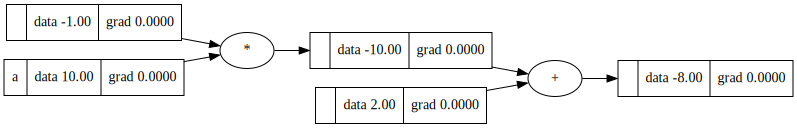

In [12]:
a = Valor(10, rotulo="a")
b = 2 - a
print(b)
plota_grafo(b)

E, finalmente, quero poder aplicar a função sigmoide (também conhecida como logística) a uma instância de `Valor`. A função sigmoide é a seguinte:

$$
S(x) = \frac{e^x}{e^x + 1}
$$



Valor(data=0.7310585786300048)


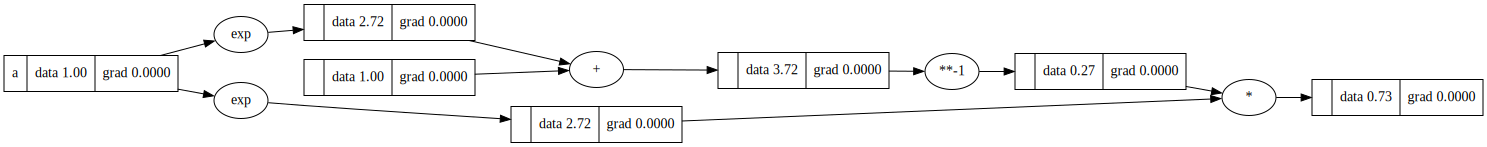

In [13]:
a = Valor(1, rotulo="a")
b = a.sig()
print(b)
plota_grafo(b)

<h2>Conclusão</h2>

O objetivo deste notebook era aprimorar a classe `Valor` desenvolvidas nos notebooks anteriores para que esta fosse capaz de fazer mais algumas operações aritiméticas básicas avançadas como a adição de números que não fossem da própria classe `Valor` (números comuns), multiplicação por números comuns, divisão entre duas instancias da classe, negativo do valor da classe entre outros. Para que os métodos fossem possíveis de ser utilizados com números comuns, foi criada uma verificação que garante que os números passados serão através de uma instancia da classe `Valor`. Alguns dos métodos `dunder` implementados foram:

<table style='border: 1px solid white; border-collapse: collapse; color: #ffffff; text-align: center;'>
    <tr style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__radd__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__rmul__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__sub__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__rsub__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__truediv__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__neg__</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>__pow__</th>
    </tr>
    <tr style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;' colspan='7'><h4><b>Utilizado para</b></h4></td>
    </tr>
    <tr style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Para quando se usa um operador de soma, porém a classe esta do lado direito do operadores, causando um erro e sendo necessária a inversão dos dados no cálculo.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Para quando se usa um operador de multiplicação, porém a classe esta do lado direito do operadores, causando um erro e sendo necessária a inversão dos dados no cálculo.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Quando tem-se um operador de subtração e a classe se encontra do lado esquerdo da operação.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Quando se usa um operador de subtração, porém a classe esta do lado direito do operados, causando um erro e sendo necessária a inversão dos dados no cálculo.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Implementar a divisão entre duas instancias da classe Valor, pegando seus respectivos dados (apenas implementado para duas instancias da classe Valor).</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Para inverter o sinal do valor armazenado dentro da classe Valor.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Quando queremos elevar o dado de uma instancia da classe Valor por um número comum (apenas implementado para números, não instancias da classe).</td>
    </tr>
</table>

Após a implementação destes métodos, foram implementados também dois métodos na classe, o método `exp` e o método `sig`. O primeiro é referente a definição matemática de exponencial, ou seja, o número de _Euler_ elevado a um valor $x$, representado pela equação abaixo:

$$e^x$$.

Para isso, pega-se o valor da instancia da classe e este valor é utilizado como parâmetro na função exponencial da biblioteca matemática do python `math`. O segundo método é implementado para calcular o valor da Sigmoid do valor da instância, ou seja, é calculado o valor da sigmoid quando o valor presente dentro da instância é utilizado. A função sigmoid é definida (de maneira simples) pela equação abaixo:

$$S(x) = \frac{e^x}{e^x + 1}$$.

Com isto, o notebook foi concluido, atingindo um resultado satisfatório para a implementação da classe `Valor`.

## Playground



In [14]:
import pandas as pd

# Create a DataFrame
data = {'Column 1': [1, 2, 3],
        'Column 2': [4, 5, 6],
        'Column 3': [7, 8, 9]}
df = pd.DataFrame(data)

# Apply custom styling
styled_df = df.style.set_properties(**{'background-color': '#000000',
                                       'color': 'white',
                                       'border-color': 'white'})

# Convert styled DataFrame to HTML
html_table = styled_df.render()

# Display the HTML table
from IPython.display import display, HTML
display(HTML(html_table))

,Column 1,Column 2,Column 3
0,1,4,7
1,2,5,8
2,3,6,9
